In [31]:
import pandas as pd
# from neuralprophet import NeuralProphet, set_log_level, set_random_seed
from src.model.features import add_stock_price_feature

df = pd.read_csv('data/stocks/2330_stock_data_0317.csv', parse_dates=['ds'])
df = add_stock_price_feature(df)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 566 entries, 4 to 569
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Unnamed: 0                566 non-null    int64         
 1   ds                        566 non-null    datetime64[ns]
 2   open_price                566 non-null    float64       
 3   high_price                566 non-null    float64       
 4   low_price                 566 non-null    float64       
 5   y                         566 non-null    float64       
 6   volume                    566 non-null    int64         
 7   foreign                   566 non-null    int64         
 8   investment                566 non-null    int64         
 9   dealer                    566 non-null    int64         
 10  ratio_over_400_shares     566 non-null    float64       
 11  shareholders_400_to_600   566 non-null    int64         
 12  shareholders_600_to_800   5

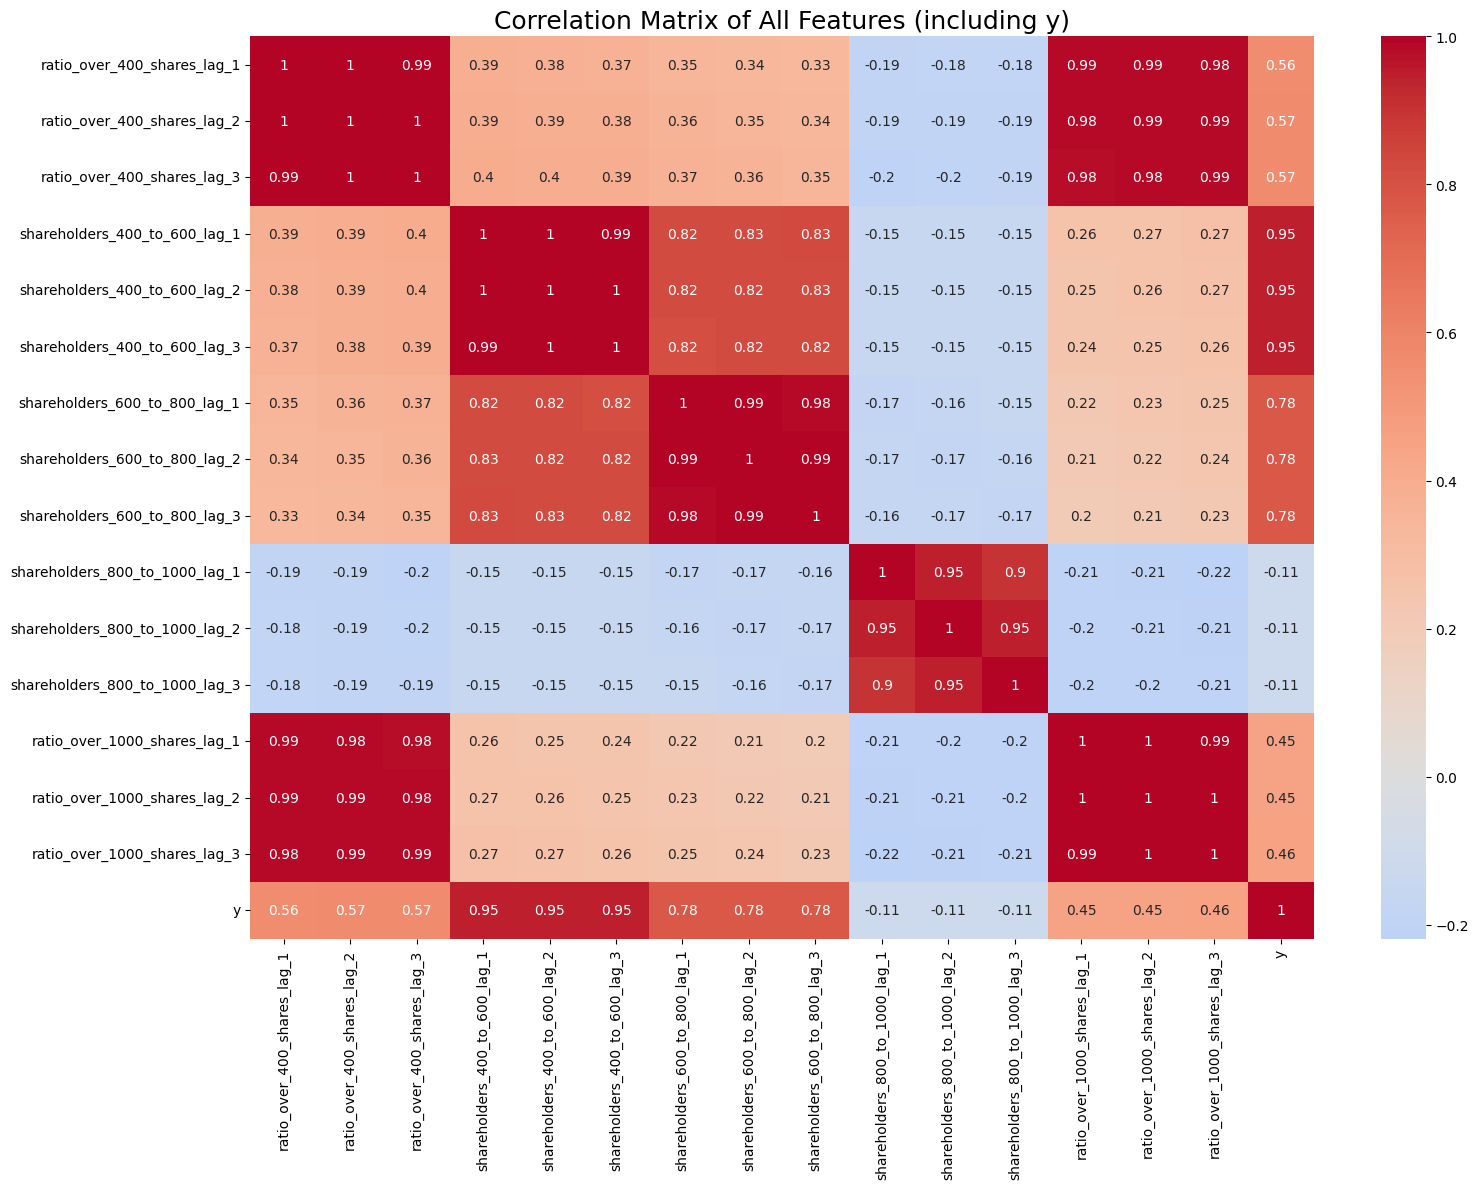

In [32]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# --- Generate lag features for external_var ---
# external_vars = ["volume", "MA", "high_low_diff"]
# external_vars = ["foreign", "investment", "dealer"]
external_vars = ["ratio_over_400_shares", "shareholders_400_to_600", "shareholders_600_to_800", "shareholders_800_to_1000", "ratio_over_1000_shares"]
max_lag = 3

# Create lagged features for each external variable
for var in external_vars:
    for lag in range(1, max_lag + 1):
        df[f"{var}_lag_{lag}"] = df[var].shift(lag)

# Compute correlation matrix with y
lag_cols = [col for col in df.columns if "lag" in col]

# Compute full correlation matrix
corr_matrix = df[lag_cols + ["y"]].corr()

# Optional: remove NaN rows/columns if shifts caused them
corr_matrix = corr_matrix.dropna(how="all").dropna(axis=1, how="all")


plt.figure(figsize=(16, 12))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", center=0)
plt.title("Correlation Matrix of All Features (including y)", fontsize=18)
plt.tight_layout()
plt.show()